<a href="https://colab.research.google.com/github/boboinRL/PDS/blob/main/Diabetes_1_last_700_as_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Data analysis in Python

We provide a brief example of using Python to perform data analysis.

We shall be looking at the well known Pima Indians Diabetes dataset. You may view information about this data from
[https://archive.ics.uci.edu/ml/datasets/diabetes](https://archive.ics.uci.edu/ml/datasets/diabetes)
or
[https://www.kaggle.com/uciml/pima-indians-diabetes-database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

We have downloaded it already for you as a csv file called 'DiabetesData.csv'.

In [39]:
import pandas as pd # Functionality for performing data analysis
import matplotlib.pyplot as plt  # Functionality to visualise our data
import numpy as np

# Read in a file and store it in a Pandas dataframe
# Assuming the file is uploaded to the Colab environment
diabetes_data = pd.read_csv("DiabetesData.csv")

In [40]:
#Display the first 5 rows of our data
diabetes_data.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,pos
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,neg
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,pos
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,neg
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,pos


In [41]:
# Only numeric features shown
diabetes_data.describe()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [42]:
# Show all columns regardless of type
print(diabetes_data.describe(include='all'))
print(diabetes_data.head())


          pregnant     glucose    pressure     triceps     insulin  \
count   768.000000  763.000000  733.000000  541.000000  394.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      3.845052  121.686763   72.405184   29.153420  155.548223   
std       3.369578   30.535641   12.382158   10.476982  118.775855   
min       0.000000   44.000000   24.000000    7.000000   14.000000   
25%       1.000000   99.000000   64.000000   22.000000   76.250000   
50%       3.000000  117.000000   72.000000   29.000000  125.000000   
75%       6.000000  141.000000   80.000000   36.000000  190.000000   
max      17.000000  199.000000  122.000000   99.000000  846.000000   

              mass    pedigree         age diabetes  
count   757.000000  768.000000  768.000000      768  
unique         NaN         NaN         NaN        2

In [43]:
#What is happening under the hood, i.e. information about the dataframe itself
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   763 non-null    float64
 2   pressure  733 non-null    float64
 3   triceps   541 non-null    float64
 4   insulin   394 non-null    float64
 5   mass      757 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   diabetes  768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB


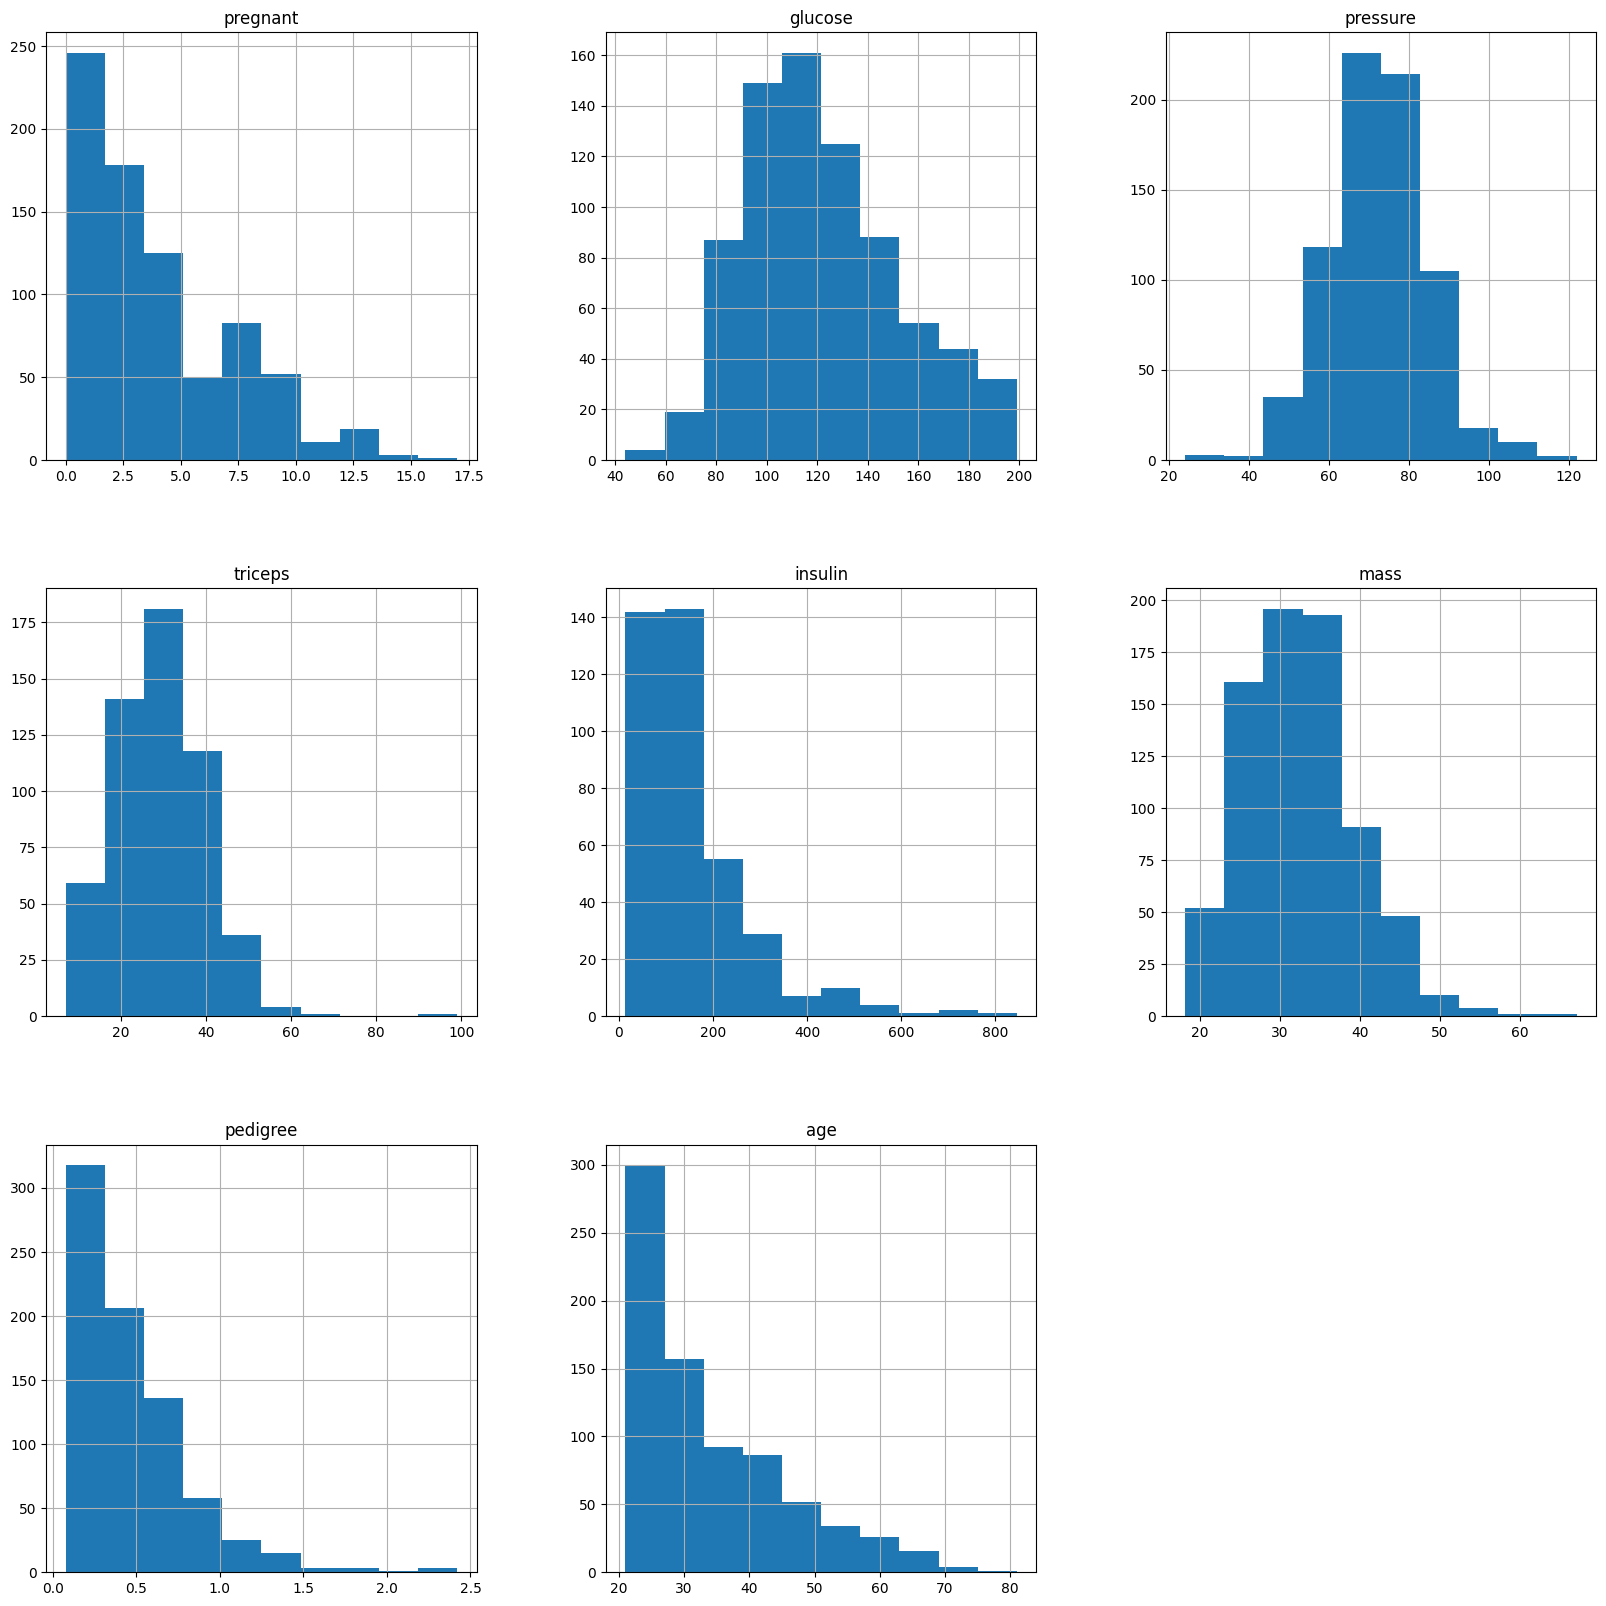

In [44]:
%matplotlib inline
# The above line is not python, this is a command directed at the jupyter notebook itself
# See, https://ipython.readthedocs.io/en/stable/interactive/magics.html

diabetes_data.hist(figsize=(20,20))
plt.show()

Next we wish to perform classification.

In [45]:
# The eighth column entitled "diabetes" is the outcome we wish to predict
print(diabetes_data.columns)

x = diabetes_data.drop('diabetes',axis=1) #column = 1, row = 0 # returns a copy
y = diabetes_data['diabetes'].copy() # make a fresh copy of the column that contains our response

# Split into train/test subsets
# The following hard-codes the split which uses the first 700 rows to build a model

x_train = x[0:700] #note the index rows 0 to 699 are selected
x_test = x[700:] # rows 700 up to the end

y_train = y[0:700]
y_test = y[700:]

Index(['pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass',
       'pedigree', 'age', 'diabetes'],
      dtype='object')


Note these slices all need to correspond. Furthermore we may wish to split using different rows. There are different ways to randomly assign rows to test and training data.

In [46]:

#Convenience function to split the data for you,
from sklearn.model_selection import train_test_split

# Note the named parameters
train_set, test_set = train_test_split(diabetes_data, test_size =0.2, random_state = 42)

# But we still need to  separate out the dependent variable. We could write a function to assist:
def SeparateDependentVariable(data_set, col_name):
    return data_set.drop(col_name,axis=1), data_set[col_name]  # returns 2 elements in the form of a tuple

# We can assign variables to elements of a  tuple very easily
x_train, y_train = SeparateDependentVariable(train_set, 'diabetes')
x_test, y_test = SeparateDependentVariable(test_set, 'diabetes')

#Alternatively we could use train_test_split to do the work for us:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 42)

Let us perform classification using logistic regression.

In [47]:
from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# There are numerous ways to perform the optimisation step. We shall use liblinear. But note that this performs regularisation.
log_reg = LogisticRegression(solver='liblinear')

#Lets build a model
log_reg.fit(x_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

It fails! Reading the error message from the bottom up we see that our input contains NaNs. Let us look a little more closely at the data.

In [48]:
diabetes_data.isna().any()

,0
pregnant,False
glucose,True
pressure,True
triceps,True
insulin,True
mass,True
pedigree,False
age,False
diabetes,False


In [49]:
cleaned_diabetes_data = diabetes_data
#cleaned_diabetes_data.describe(include='all')
column_with_Nan = ['glucose','pressure','triceps','insulin','mass']
cleaned_diabetes_data[column_with_Nan] = cleaned_diabetes_data[column_with_Nan].fillna(0)
#cleaned_diabetes_data.describe(include='all')
cleaned_diabetes_data.isna().any()


# We can - but don't have to - change the type of the response variable.
#diabetes_data["diabetes"] = diabetes_data["diabetes"].astype("category")

,0
pregnant,False
glucose,False
pressure,False
triceps,False
insulin,False
mass,False
pedigree,False
age,False
diabetes,False


We could drop the rows or columns containing missing data. We can use either the random split into test and training data or the hard coded variant. In order to compare to R it is better to use the hard coded one.

In [50]:
x = cleaned_diabetes_data.drop('diabetes',axis=1) #column = 1, row = 0 # returns a copy
y = cleaned_diabetes_data['diabetes'].copy()

#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 42)
x_train = x[-700:] #note the index rows 0 to 699 are selected
x_test = x[:-700] # rows 700 up to the end
y_train = y[-700:]
y_test = y[:-700]

log_reg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [51]:

y_predict = log_reg.predict(x_test)

# Note: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# The underlying C implementation uses a random number generator to select features when fitting the model.
# It is thus not uncommon, to have slightly different results for the same input data.
# If that happens, try with a smaller tol parameter.
print(log_reg.score(x_test, y_test))

# This just prints the accuracy:
print(sum(y_predict == y_test)/len(y_test))

0.6764705882352942
0.6764705882352942


In [52]:
# Similar result to R but there is no ability to obtain the significance or otherwise features of the model.
# We can view the coefficents of the model as follows.
print(log_reg.coef_ )
print(log_reg.intercept_)

# Perhaps print using f strings
print(f"log_reg.coef_ = {log_reg.coef_} \n log_reg.intercept_ = {log_reg.intercept_}")
# In Python 3.8 we can also write instead
# print(f"{log_reg.coef_ = } \n{log_reg.intercept_= }")

[[ 0.12318262  0.02920932 -0.01789402 -0.00358816 -0.00087922  0.06510781
   0.78997904  0.00374598]]
[-5.96583343]
log_reg.coef_ = [[ 0.12318262  0.02920932 -0.01789402 -0.00358816 -0.00087922  0.06510781
   0.78997904  0.00374598]] 
 log_reg.intercept_ = [-5.96583343]


How significant are the above coefficients? We don't know. Are the coefficients are different to R? Alternatively you might want to use the Python module statsmodels https://www.statsmodels.org/stable/index.html.